In [66]:
%matplotlib inline

import sys
from xspec import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [67]:
#
# Read a file and return a list of lines
#
# infile - File name
# lines  - List of lines in the file
#
def read_lines(infile):
    lines=[]
    fin=open(infile,'r')
    while 1:
        tline=fin.readline()
        if tline == '': break                # Reaches EOF
        if tline.strip() == '': continue     # Avoid empty lines
        lines.append(tline.strip().split())
    fin.close
    return lines
#
#
#
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

In [138]:
file1='ips.txt'
data = read_lines(file1)

for line in data:
    print line

['#ion', 'Z', 'N', 'Zeff', 'NIST', 'Err', 'mu=0', 'mu=0.1', 'mu=0.2', 'mu=0.25']
['o_i', '8', '8', '1', '13.61804', '7', '13.07', '10.33', '7.68', '6.42']
['o_ii', '8', '7', '2', '35.12111', '6', '35.00', '29.68', '24.68', '22.30']
['o_iii', '8', '6', '3', '54.93554', '12', '54.80', '46.90', '39.58', '36.12']
['o_iv', '8', '5', '4', '77.41350', '25', '77.31', '66.82', '57.09', '52.52']
['o_v', '8', '4', '5', '113.8989', '5', '112.81', '99.75', '87.76', '82.14']
['o_vi', '8', '3', '6', '138.1189', '21', '138.04', '122.41', '108.09', '101.37']
['o_vii', '8', '2', '7', '739.32679', '6', '739.86', '720.99', '702.48', '693.36']
['Fe_ii', '26', '25', '2', '16.19920', '5', '18.89', '14.20', '-99.0', '7.78']
['Fe_iii', '26', '24', '3', '30.651', '12', '32.93', '25.60', '-99.0', '16.42']
['Fe_iv', '26', '23', '4', '54.91', '4', '55.37', '44.65', '-99.0', '29.64']
['Fe_v', '26', '22', '5', '75.0', '2', '74.92', '61.56', '-99.0', '42.83']
['Fe_vi', '26', '21', '6', '98.985', '15', '98.20', '82.20

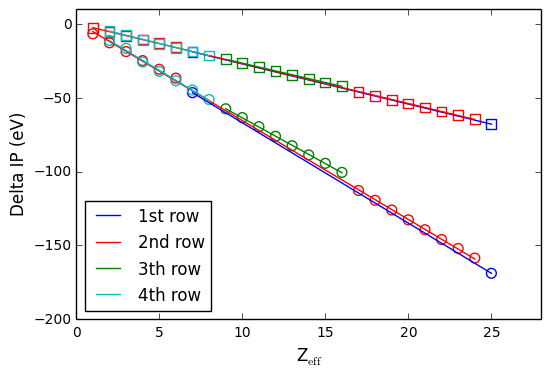

-- Coefficients for mu=0.1

First row (N=2):           0.173888888889 -2.72055555556
Second row (3 < N < 10):   0.24155049303 -2.70427949677
Third row (11 < N < 18):  -0.375238095238 -2.61488095238
Fourth row (19 < N < 36):  0.727857142857 -2.775

-- Coefficients for mu=0.25

First row (N=2):           1.09222222222 -6.79888888889
Second row (3 < N < 10):   1.56979258756 -6.6976599796
Third row (11 < N < 18):  -1.64559523809 -6.19345238095
Fourth row (19 < N < 36):  2.40892857143 -6.76035714286


In [285]:
# Clean the figure
plt.clf()

lw = 2   # Line widths throughout the plot
fsz = 16 # Font size throughout the plot
plt.rc('axes', labelsize=12)  # fontsize of the x any y labels

# Square figure
#fig, (ax) = plt.subplots(1,1,facecolor='w',figsize=(6,4))

#
plt.legend(loc='bottom left')

# Labels
plt.xlabel('Z$_\mathrm{eff}$')
plt.ylabel('Delta IP (eV)')

#limits
plt.xlim(0.,28)
plt.ylim(-200.,10.)


# First row (N=2)
zeff=[]
mu0=[]
dmu1=[]
dmu2=[]
dmu25=[]
for i, line in enumerate(data):
    if (i>0 and int(line[2])==2):
        zeff.append(float(line[3]))
        mu0.append(float(line[6]))
        dmu1.append(float(line[7])-float(line[6]))
        dmu2.append(float(line[8])-float(line[6]))
        dmu25.append(float(line[9])-float(line[6]))
        
i10b = estimate_coef(np.asarray(zeff), np.asarray(dmu1))
i25b = estimate_coef(np.asarray(zeff), np.asarray(dmu25))

# predicted response vector 
i10dmu_pred = i10b[0] + i10b[1]*np.asarray(zeff)
i25dmu_pred = i25b[0] + i25b[1]*np.asarray(zeff)

plt.scatter(zeff,dmu1, marker="s", s=50, color="b", facecolors='none')
plt.scatter(zeff,dmu25, marker="o", s=50, color="b", facecolors='none')

# plotting the regression line 
plt.plot(np.asarray(zeff), i10dmu_pred, color = "b", label=r"1st row") 
plt.plot(np.asarray(zeff), i25dmu_pred, color = "b") 

#-------------------------------------------------------------------
# Second row (3 < N < 10)

zeff=[]
mu0=[]
dmu1=[]
dmu2=[]
dmu25=[]
for i, line in enumerate(data):
    if (i>0 and int(line[2])>=3 and int(line[2])<=10):
        zeff.append(float(line[3]))
        mu0.append(float(line[6]))
        dmu1.append(float(line[7])-float(line[6]))
        dmu2.append(float(line[8])-float(line[6]))
        dmu25.append(float(line[9])-float(line[6]))
        
ii10b = estimate_coef(np.asarray(zeff), np.asarray(dmu1))
ii25b = estimate_coef(np.asarray(zeff), np.asarray(dmu25))

# predicted response vector 
ii10dmu_pred = ii10b[0] + ii10b[1]*np.asarray(zeff)
ii25dmu_pred = ii25b[0] + ii25b[1]*np.asarray(zeff)

plt.scatter(zeff,dmu1, marker="s", s=50, color = "r", facecolors='none')
plt.scatter(zeff,dmu25, marker="o", s=50, color = "r", facecolors='none')

# plotting the regression line 
plt.plot(np.asarray(zeff), ii10dmu_pred, color = "r", label=r"2nd row") 
plt.plot(np.asarray(zeff), ii25dmu_pred, color = "r") 

#-------------------------------------------------------------------
# Third row (11 < N < 18)

zeff=[]
mu0=[]
dmu1=[]
dmu2=[]
dmu25=[]
for i, line in enumerate(data):
    if (i>0 and int(line[2])>=11 and int(line[2])<=18):
        zeff.append(float(line[3]))
        mu0.append(float(line[6]))
        dmu1.append(float(line[7])-float(line[6]))
        dmu2.append(float(line[8])-float(line[6]))
        dmu25.append(float(line[9])-float(line[6]))
        
iii10b = estimate_coef(np.asarray(zeff), np.asarray(dmu1))
iii25b = estimate_coef(np.asarray(zeff), np.asarray(dmu25))

# predicted response vector 
iii10dmu_pred = iii10b[0] + iii10b[1]*np.asarray(zeff)
iii25dmu_pred = iii25b[0] + iii25b[1]*np.asarray(zeff)

plt.scatter(zeff, dmu1, marker="s", s=50, color = "g", facecolors='none')
plt.scatter(zeff, dmu25, marker="o", s=50, color = "g", facecolors='none')

# plotting the regression line 
plt.plot(np.asarray(zeff), iii10dmu_pred, color = "g", label=r"3th row") 
plt.plot(np.asarray(zeff), iii25dmu_pred, color = "g") 

#-------------------------------------------------------------------
# Fourth row (19 < N < 36)

zeff=[]
mu0=[]
dmu1=[]
dmu2=[]
dmu25=[]
for i, line in enumerate(data):
    if (i>0 and int(line[2])>=19 and int(line[2])<=36):
        zeff.append(float(line[3]))
        mu0.append(float(line[6]))
        dmu1.append(float(line[7])-float(line[6]))
        dmu2.append(float(line[8])-float(line[6]))
        dmu25.append(float(line[9])-float(line[6]))
        
iv10b = estimate_coef(np.asarray(zeff), np.asarray(dmu1))
iv25b = estimate_coef(np.asarray(zeff), np.asarray(dmu25))

# predicted response vector 
iv10dmu_pred = iv10b[0] + iv10b[1]*np.asarray(zeff)
iv25dmu_pred = iv25b[0] + iv25b[1]*np.asarray(zeff)

plt.scatter(zeff, dmu1, marker="s", s=50, color = "c", facecolors='none')
plt.scatter(zeff, dmu25, marker="o", s=50, color = "c", facecolors='none')

# plotting the regression line 
plt.plot(np.asarray(zeff), iv10dmu_pred, color = "c", label=r"4th row") 
plt.plot(np.asarray(zeff), iv25dmu_pred, color = "c") 

plt.legend(loc='l left')


plt.show()  #

#-------------------------------------------------------------------

print '-- Coefficients for mu=0.1'
print ''
print 'First row (N=2):          ',i10b[0], i10b[1]
print 'Second row (3 < N < 10):  ',ii10b[0], ii10b[1]
print 'Third row (11 < N < 18): ',iii10b[0], iii10b[1]
print 'Fourth row (19 < N < 36): ',iv10b[0], iv10b[1]

print ''
print '-- Coefficients for mu=0.25'
print ''
print 'First row (N=2):          ',i25b[0], i25b[1]
print 'Second row (3 < N < 10):  ',ii25b[0], ii25b[1]
print 'Third row (11 < N < 18): ',iii25b[0], iii25b[1]
print 'Fourth row (19 < N < 36): ',iv25b[0], iv25b[1]


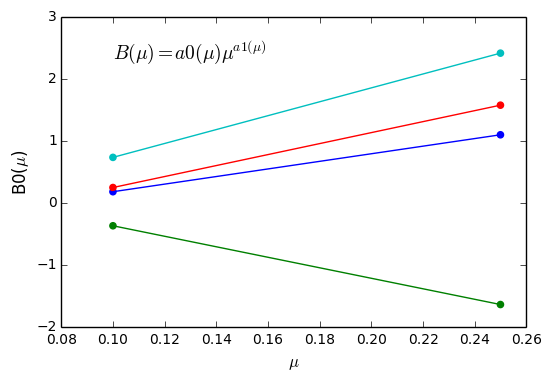

Coefficients for B0_X = a0_X*mu**a1_X
(where X denotes the row)

X    a0_X    a1_X
1   17.6075 2.00543
2   26.6448 2.04261
3  -15.4048 1.61335
4   14.7305 1.30617

Coefficients for B1_X = a2_X*mu
(where X denotes the row)

X    a2_X
1   -27.1888888889
2   -26.6225365522
3   -23.8571428571
4   -26.569047619


In [288]:
#
mu=[0.1,0.25]
acof1=[]
acof1.append(i10b[0])
acof1.append(i25b[0])

acof2=[]
acof2.append(ii10b[0])
acof2.append(ii25b[0])

acof3=[]
acof3.append(iii10b[0])
acof3.append(iii25b[0])

acof4=[]
acof4.append(iv10b[0])
acof4.append(iv25b[0])


# Labels
plt.xlabel('$\mu$')
plt.ylabel('B0($\mu$)')

plt.scatter(mu,acof1,color='b')
plt.scatter(mu,acof2,color='r')
plt.scatter(mu,acof3,color='g')
plt.scatter(mu,acof4,color='c')

# Linear coefficient B0_X: fit the formula B0_X=a0_X*mu**a1_X
# (these fits were done in gnuplot)
#
a0_1               = 17.6075        
a1_1               = 2.00543 
B0_1 = a0_1*np.power(mu,a1_1)
plt.plot(mu,B0_1, color='b')

a0_2               = 26.6448        
a1_2               = 2.04261
B0_2 = a0_2*np.power(mu,a1_2)
plt.plot(mu,B0_2, color='r')

a0_3               = -15.4048        
a1_3               = 1.61335
B0_3 = a0_3*np.power(mu,a1_3)
plt.plot(mu,B0_3, color='g')

a0_4               = 14.7305        
a1_4               = 1.30617        
B0_4 = a0_4*np.power(mu,a1_4)
plt.plot(mu,B0_4, color='c')

plt.text(0.1,2.3,r'$B(\mu)=a0(\mu)\mu^{a1(\mu)}$', fontsize='14')

plt.show()

# Coefficients:
#
print 'Coefficients for B0_X = a0_X*mu**a1_X'
print '(where X denotes the row)'
print ''
print 'X    a0_X    a1_X'
print '1  ',a0_1,   a1_1
print '2  ',a0_2,   a1_2
print '3 ',a0_3,   a1_3
print '4  ',a0_4,   a1_4

#
# Now the slope...
#
# Linear coefficient B1_X: fit the formula B1_X=a2_X*mu

a2_1 = (i25b[1]-i10b[1])/(mu[1]-mu[0])
a2_2 = (ii25b[1]-ii10b[1])/(mu[1]-mu[0])
a2_3 = (iii25b[1]-iii10b[1])/(mu[1]-mu[0])
a2_4 = (iv25b[1]-iv10b[1])/(mu[1]-mu[0])

print ''
print 'Coefficients for B1_X = a2_X*mu'
print '(where X denotes the row)'
print ''
print 'X    a2_X'
print '1  ',a2_1
print '2  ',a2_2
print '3  ',a2_3
print '4  ',a2_4



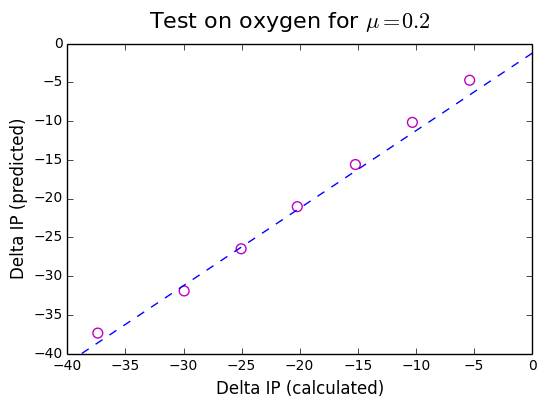

In [289]:
# Test the fitting formulas on the mu=0.2 case for oxygen
#
zeff=[]
nele=[]
dmu2=[]
for i, line in enumerate(data):
    if (i>0 and int(line[1])==8):
        zeff.append(float(line[3]))
        nele.append(int(line[2]))
        dmu2.append(float(line[8])-float(line[6]))
        
mu=0.2
B0_1 = a0_1*np.power(mu,a1_1)
B0_2 = a0_2*np.power(mu,a1_2)
B0_3 = a0_3*np.power(mu,a1_3)
B0_4 = a0_4*np.power(mu,a1_4)

# Slope (Temporary, this can be improved!)
B1_1 = a2_1*mu
B1_2 = a2_2*mu
B1_3 = a2_3*mu
B1_4 = a2_4*mu

# Choose the right formula according to the number of electrons
for nn in nele:
    if (nn==2):             dmu2_pred = B0_1 + B1_1*np.asarray(zeff)
    if (nn>=3  and nn<=10): dmu2_pred = B0_2 + B1_2*np.asarray(zeff)
    if (nn>=11 and nn<=18): dmu2_pred = B0_3 + B1_3*np.asarray(zeff)
    if (nn>=19 and nn<=36): dmu2_pred = B0_4 + B1_4*np.asarray(zeff)
        
plt.scatter(dmu2, dmu2_pred, marker="o", s=50, color = "m", facecolors='none')
plt.plot([0,10],[0,10], transform=ax.transAxes, linestyle="--")

plt.text(-33, 2, r'Test on oxygen for $\mu=0.2$', fontsize='16')
# Labels
plt.xlabel('Delta IP (calculated)')
plt.ylabel('Delta IP (predicted)')